# Transformada de Laplace em Python

## Transformada de Laplace Direta

A transformada de Laplace para um sinal causal ($x(t) = 0$ para $t < 0$) é definida como:

$$
X(s) = \int_{0}^\infty x(t)e^{-st}dt = \lim_{R\to\infty} \int_{0}^R x(t)e^{-st}dt
$$

Para utilizar a transformada de Laplace em Python, deveremos utilizar computação simbólica. No caso, utilizamos a função `sympy` e deveremos:
* Criar as variáveis simbólicas para $t$ e $s$;
* Definir a função para o cálculo da transformada de Laplace utilizando a função `laplace_transform` da biblioteca `sympy`. Utilizamos os argumentos `noconds=True` para apresentar apenas a transformada de Laplace e `simplify=True` para simplificar o cálculo simbólico.

In [1]:
import sympy as sympy
sympy.init_printing()

t, s = sympy.symbols('t, s')

def Laplace(x):
    return sympy.laplace_transform(x, t, s, noconds=True, simplify=True)

**Exemplo 1:** Determinar a transformada de Laplace de $x(t) = u(t)$.

In [3]:
x = 1
Xs = Laplace(x)
Xs

**Exemplo 2:** Determinar a transformada de Laplace de $x(t) = tu(t)$.

In [4]:
x = t
Xs = Laplace(x)
Xs

**Exemplo 3:** Determinar a transformada de Laplace de $x(t) = e^{-at}u(t)$.

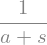

In [5]:
a = sympy.symbols('a', real=True)
x = sympy.exp(-a*t)
Xs = Laplace(x)
Xs

**Exemplo 4:** Determinar a transformada de Laplace de $x(t) = te^{-at}u(t)$.

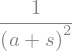

In [6]:
x = t*sympy.exp(-a*t)
Xs = Laplace(x)
Xs

**Exemplo 5:** Determinar a transformada de Laplace de $x(t) = \cos (bt) u(t)$.

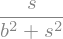

In [7]:
b = sympy.symbols('b', real=True)
x = sympy.cos(b*t)
Xs = Laplace(x)
Xs

**Exemplo 6:** Determinar a transformada de Laplace de $x(t) = \sin (bt) u(t)$.

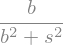

In [8]:
x = sympy.sin(b*t)
Xs = Laplace(x)
Xs

**Exemplo 7:** Determinar a transformada de Laplace de $x(t) = \delta (t)$.

In [19]:
x = sympy.DiracDelta(t)
Xs = Laplace(x)
Xs

## Transformada de Laplace Inversa

Para utilizar a transformada de Laplace inversa em Python, utilizamos a função `inverse_laplace_transform` da biblioteca `numpy`. Podemos criar uma função especializada para isso:

In [9]:
def invLaplace(X):
    return sympy.inverse_laplace_transform(X, s, t)

**Exemplo 8:** Determinar a transformada de Laplace inversa de $X(s) = 3/s^2$.

In [10]:
Xs = 3/s**2
x = invLaplace(Xs)
x

**Exemplo 9:** Determinar a transformada de Laplace inversa de $X(s) = \frac{s}{s^2+6}$.

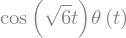

In [11]:
Xs = s/(s**2 + 6)
x = invLaplace(Xs)
x

**Exemplo 10:** Determinar a transformada de Laplace inversa de $X(s) = \frac{5}{s^2 + 3s + 2}$.

In [12]:
Xs = 5/(s**2 + 3*s + 2)
x = invLaplace(Xs)
x

Essa transformada de Laplace pode ser obtida utilizando-se expansão em expansões parciais. Utilizando a função `apart` podemos realizar a expansão em frações parciais.

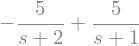

In [13]:
sympy.apart(Xs,s)

**Exemplo 11:** Determinar a transformada de Laplace inversa de $X(s) = \frac{6(s+34)}{s(s^2 + 10s + 34)}$.

In [14]:
Xs = (6*(s+34))/(s*(s**2 + 10*s + 34))
x = invLaplace(Xs)
x

Utilizando expansão em frações parciais:

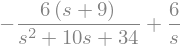

In [15]:
sympy.apart(Xs,s)

**Exemplo 12:** Determinar a transformada de Laplace inversa de $X(s) = \frac{2s + 5}{(s+1)^3}$.

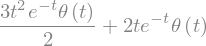

In [17]:
Xs = (2*s + 5)/((s+1)**3)
x = invLaplace(Xs)
x

Utilizando expansão em frações parciais:

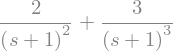

In [18]:
sympy.apart(Xs,s)

## Análise de Sistemas Utilizando a Transformada de Laplace

Podemos utilizar a transformada de Laplace para realizar a análise de sistemas lineares e invariantes no tempo.

**Exemplo 13:** Dado um sistema descrito para seguinte equação diferencial:

$$
\ddot{y} + 5\dot{y} + 6y = \dot{x} + x
$$

Determine a saída do sistema quando a entrada é $x(t) = e^{-4t}u(t)$.

In [21]:
H = (s + 1)/(s**2 + 5*s + 6)
h = invLaplace(H)
h

Agora vamos criar uma função para calcular a convolução entre dois sinais de forma simbólica:

In [27]:
tau = sympy.symbols('tau', real=True)

def Convolution(x, h):
    return sympy.simplify(sympy.integrate(h.subs(t, tau)*x.subs(t, t - tau), (tau, 0, t)))

Calculando a convolução (resposta de estado nulo $\to$ condições iniciais nulas):

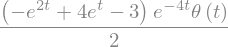

In [28]:
x = sympy.exp(-4*t)
y_phi = Convolution(x,h)
y_phi

### Resposta ao Impulso, Degrau e Forçada

Embora o cálculo símbolico seja poderoso, em vários momentos estamos interessado somente no formato da saída, e não necessariamente a expressão matemática da saída para todo $t$. Para essas situações, o cálculo símbolico não é adequado. No caso, é melhor utilizar o cálculo numérico.

Uma das melhores bibliotecas do Python para tratar com o cálculo numérico da saída de sistemas descritos por funções de transferência é a `control`. Essa não é uma biblioteca padrão, sendo necessário instalar.

```Python
pip install control
```

Para criar uma função de transferência utilizamos a função `tf()`, que recebe como argumento dois vetores: o primeiro corresponde ao vetor de coeficientes do polinômio numerador da função transferência, o segundo argumento é o vetor de coeficientes do polinômio denominador da função transferência.

**Exemplo 14:** Determinar a resposta ao impulso, a resposta ao degrau e a resposta à $x(t) = e^{-2t}u(t)$ do sistema descrito pela seguinte função de transferência:

$$
H(s) = \frac{2}{3s + 1}
$$


In [4]:
import numpy as np
import control as control
import matplotlib.pyplot as plt

#Muda a fonte dos Plots para Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = "Times New Roman"
plt.rcParams['mathtext.it'] = "Times New Roman:italic"
plt.rcParams['mathtext.bf'] = "Times New Roman:bold"

num = np.array([2])
den = np.array([3 , 1])
H = control.tf(num , den)
H

TransferFunction(
array([2]),
array([3, 1]),
outputs=1, inputs=1)

Diagrama de polos e zeros:

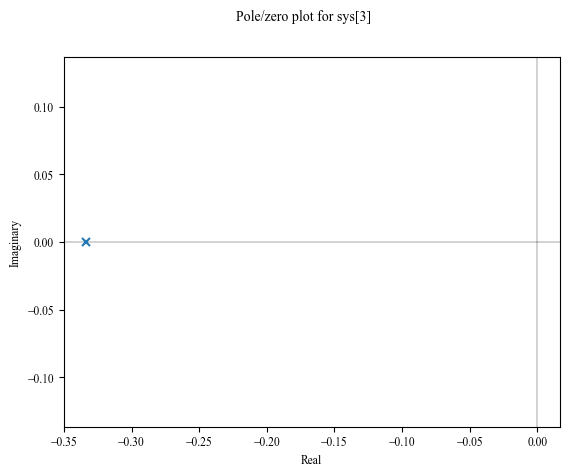

In [10]:
control.pzmap(H)

Resposta ao impulso:

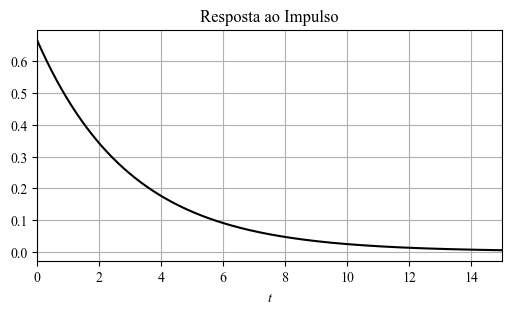

In [7]:
t0 = 0
tend = 15
dt = 1e-4
Npoints = int((tend - t0)/dt)
T = np.linspace(t0,tend,Npoints)

t, h = control.impulse_response(H, T)

plt.figure(figsize=(6,3))
plt.plot(t, h, 'k')
plt.title("Resposta ao Impulso")
plt.xlabel("$t$")
plt.grid()
plt.xlim(t0,tend)
plt.show()

Resposta ao degrau:

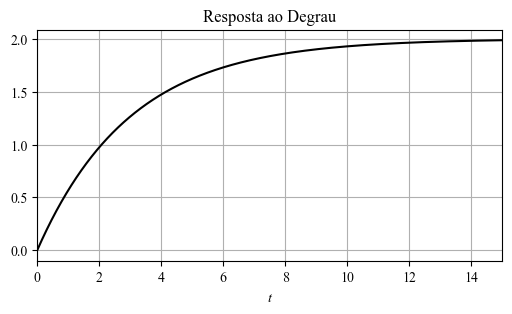

In [8]:
t0 = 0
tend = 15
dt = 1e-4
Npoints = int((tend - t0)/dt)
T = np.linspace(t0,tend,Npoints)

t, sr = control.step_response(H, T)

plt.figure(figsize=(6,3))
plt.plot(t, sr, 'k')
plt.title("Resposta ao Degrau")
plt.xlabel("$t$")
plt.grid()
plt.xlim(t0,tend)
plt.show()

Resposta à exponencial $x(t) = e^{-2t}u(t)$:

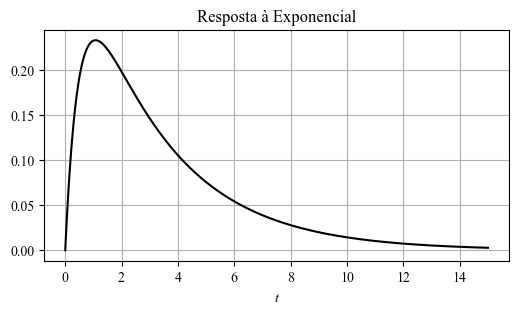

In [9]:
t0 = 0
tend = 15
dt = 1e-4
Npoints = int((tend - t0)/dt)
T = np.linspace(t0,tend,Npoints)

x = np.exp(-2 * T)
t, y = control.forced_response(H, T, x)

plt.figure(figsize=(6,3))
plt.plot(t, y, 'k')
plt.title("Resposta à Exponencial")
plt.xlabel("$t$")
plt.grid()
plt.show()

### Interconexão de Sistemas

**Exemplo 15:** Considere duas funções de transferência dadas:

$$
H_1(s) = \frac{2}{s}
$$

$$
H_2(s) = \frac{1}{s + 2}
$$

A associação em série é dada por:

In [11]:
H1 = control.tf([2] , [1,0])
H2 = control.tf([1] , [1,2])
Hseries = control.series(H1,H2)
Hseries

TransferFunction(
array([2]),
array([1, 2, 0]),
outputs=1, inputs=1)

A associação em paralelo é dada por:

In [12]:
Hparallel = control.parallel(H1,H2)
Hparallel

TransferFunction(
array([3, 4]),
array([1, 2, 0]),
outputs=1, inputs=1)

A associação em feedback negativo é dada por:

In [13]:
Hfeedback = control.feedback(H1, H2, sign=-1)
Hfeedback

TransferFunction(
array([2, 4]),
array([1, 2, 2]),
outputs=1, inputs=1)

## Exemplo de Aplicação - Controle de um Motor de Corrente Contínua

Segundo o Castrucci: "os motores de corrente contínua são muito utilizados nas indústrias, pois são empregados para realizar diversos tipos de acionamentos mecânicos". A Figura abaixo (Castrucci) representa um esquema de um motor de corrente contínua controlado por armadura.

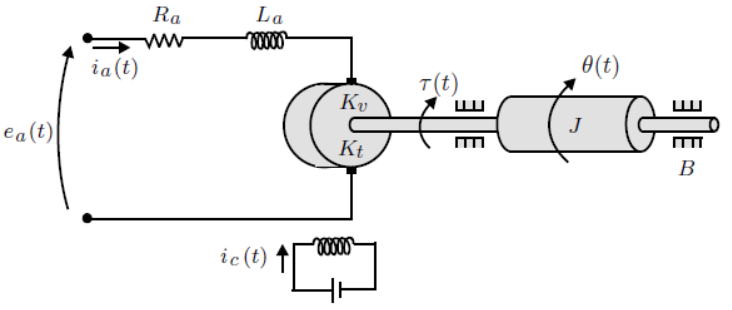

Em que:
- $e_a(t)$: tensão de armadura;
- $i_a(t)$: corrente de armadura;
- $R_a$: resistência de armadura;
- $L_a$: indutância de armadura;
- $i_c(t)$: corrente de campo do motor;
- $\tau(t)$: conjungado eletromagnético (torque) do motor;
- $\theta(t)$: posição angular do eixo;
- $B$: coeficiente do atrito angular;
- $J$: inércia do conjunto formado pelo rotor do motor e pela carga mecânica;
- $K_t$: consante de proporcionalidade entre o conjugado eletromagnético do motor e a corrente de armadura;
- $K_v$: constante de proporcionalidade entre a força contraeletromotriz gerada pela armadura em toração e a velocidade angular do eixo.
  
O motor DC pode ser aproximado por uma função transferência de primeira ordem:

$$
\frac{\Omega(s)}{E_a(s)} = G(s) = \frac{K_m}{a s + 1}
$$

sendo:

$$
K_m = \frac{K_t}{R_aB + K_vK_t}
$$

$$
a = \frac{R_aJ}{R_aB + K_vK_t}
$$

Vamos supor um determinado motor da ElectroCraft de corrente máxima de 2A e tensão máxima de 30V e que possui os seguintes parâmetros estimados:

- $R_a = 3 \Omega$
- $L_a = 6 \mathrm{mH}$
- $K_t = K_v = 50 \times 10^{-3} \; \mathrm{N\cdot m/A}$ 
- $J = 10^{-4}  \;  \mathrm{N\cdot m\cdot s^2/rad}$
- $B = 1,05 \times 10^{-4}  \;  \mathrm{N\cdot m\cdot s/rad}$

Calculando os parâmetros da função transferência de primeira ordem:

In [14]:
Ra = 3
La = 6e-3
Kv = 50e-3
Kt = 50e-3
J = 1e-4
B = 1.05e-4

Km = Kt/(Ra*B + Kv*Kt)
a = Ra*J/(Ra*B + Kv*Kt)

print('Km = ', Km)
print('a = ', a)

Km =  17.76198934280639
a =  0.10657193605683835


Criando a função de transferência do motor C.C.:

In [15]:
import numpy as np
import control as control
import matplotlib.pyplot as plt

num = np.array([Km])
den = np.array([a , 1])
G = control.tf(num , den)
G

TransferFunction(
array([17.76198934]),
array([0.10657194, 1.        ]),
outputs=1, inputs=1)

Simular a saída considerando que na entrada é aplicado um degrau de tensão com 10 V de amplitude:

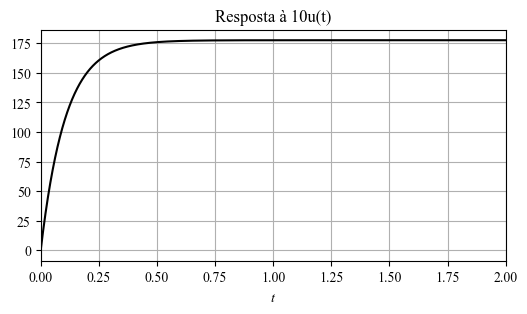

In [17]:
t0 = 0
tend = 2
dt = 1e-4
Npoints = int((tend - t0)/dt)
T = np.linspace(t0,tend,Npoints)

x = 10
t, y = control.forced_response(G, T, x)

plt.figure(figsize=(6,3))
plt.plot(t, y, 'k')
plt.title("Resposta à 10u(t)")
plt.xlabel("$t$")
plt.grid()
plt.xlim(0, tend)
plt.show()

## Exemplo de Aplicação - Sistemas de Controle

Em controle temos a definição de [Fonte: https://materialpublic.imd.ufrn.br/curso/disciplina/1/63/2/8]:

- O regime transiente é analisado a partir do instante em que se aplica uma entrada até o instante em que o sistema não varia mais (ou varia pouco).
- O regime permanente é analisado a partir do instante que sua saída não varia mais (ou varia pouco).

Para o motor analisado, o transiente demora aproximadamente 0,5s. 

Na prática, nós queremos que o motor "gire" a uma certa velocidade angular. Todavia, no motor modelado, a entrada é um valor de tensão. Qual deve ser o valor de tensão aplicado para que o motor gire em uma certa velocidade? Poderiamos pensar em contratar um operador que, medindo a velocidade do motor, pudesse aplicar mais ou menos tensão nos terminais do motor. Se a velocidade do motor estiver baixa, ele aumenta a tensão aplicada. Se a velocidade do motor estiver alta, ele diminui a tensão aplicada. Esse operador seria um "controlador" para o motor, e está ilustrado na Figura abaixo:

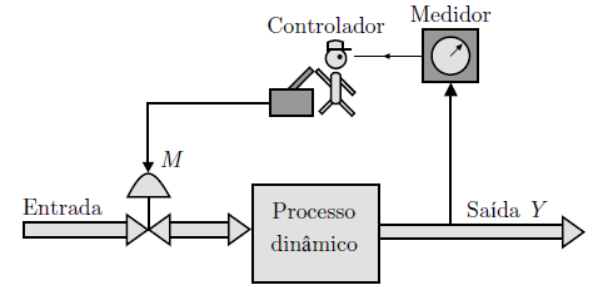

Podemos construir um sistema que se comporte como esse controlador. O esquema mais simples de controle é apresentado na Figura abaixo:

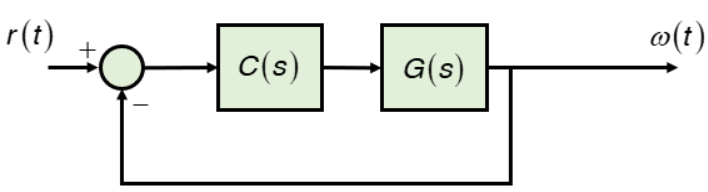

O sinal $r(t)$ é chamado de referência. O controlador é representado pelo sistema $C(s)$, e recebe como informação o sinal de erro entre a saída do motor $G(s)$, representado pelo sinal $\omega(t)$, e a referência:

$$
e(t) = r(t) - \omega (t)
$$

se $e(t) = 0$, a saída da planta é igual à referência e portanto nada é feito. Se $e(t) > 0$, que dizer que a velocidade de rotação do motor é menor do que a referência, e portanto o controlador deve aplicar mais tensão nos terminais do motor. Se $e(t) < 0$, que dizer que a velocidade de rotação do motor é maior do que a referência, e portanto o controlador deve aplicar menos tensão nos terminais do motor. O sinal gerado pelo controlador e aplicado ao motor é chamado de sinal de controle.

A função transferência em malha fechada será:

$$
H(s) = \frac{C(s)G(s)}{1 + G(s)C(s)}
$$

Vamos utilizar um controlador proporcional, tal que $C(s) = 0.5$. Vamos determinar a função transferência em malha fechada:

In [23]:
K = 0.7
C = control.tf(K , 1)
CG = control.series(C,G)
H = control.feedback(CG,1,sign=-1)
H

TransferFunction(
array([12.43339254]),
array([ 0.10657194, 13.43339254]),
outputs=1, inputs=1)

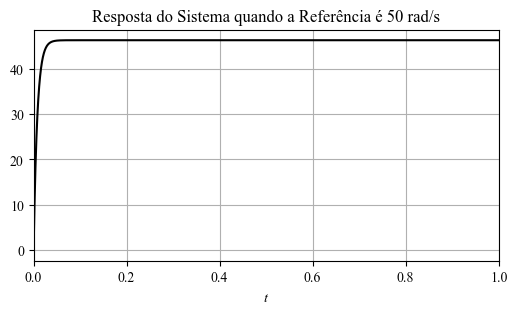

In [24]:
t0 = 0
tend = 1
dt = 1e-4
Npoints = int((tend - t0)/dt)
T = np.linspace(t0,tend,Npoints)

r = 50
t, y = control.forced_response(H, T, r)

plt.figure(figsize=(6,3))
plt.plot(t, y, 'k')
plt.title("Resposta do Sistema quando a Referência é 50 rad/s")
plt.xlabel("$t$")
plt.grid()
plt.xlim(0, tend)
plt.show()